# NYC Hate Crimes Analysis (2023)

## Project Overview: NYC Hate Crimes Analysis

**Objective:**
Identify which demographic groups (race, religion, sexual orientation, etc.) have been most frequently targeted in hate crimes across New York City.

Completed by Reyhan Quayum on February 14, 2023

**Scope:**

* **Population:** Residents of NYC
* **Discipline:** Criminology, Data Analysis
* **Geographic Focus:** New York City
* **Time Frame:** October 2020 – February 2023
* **Data Requirements:** Dataset containing at least 1,000 reported hate crimes with demographic details

**Data Sources:**
The analysis uses publicly available data from NYC Open Data and official police department records.


## Data Set Description

**Name:** NYPD Hate Crimes
**Source & Access:** [NYPD Hate Crimes Dataset on NYC Open Data](https://data.cityofnewyork.us/Public-Safety/NYPD-Hate-Crimes/bqiq-cu78)

**Details:**

* **Author / Creator:** New York Police Department (NYPD)
* **Publication Date:** Originally published October 29, 2020; latest update February 1, 2023
* **Publisher:** NYC Open Data
* **Data Accessed:** February 14, 2023
* **Format:** csv
* **Size:** 334 KB
* **Number of Records:** 1,971
* **License:** *\[To be confirmed]*

**Usage:**
This dataset is suitable for analyzing hate crime trends in NYC over the specified period. It provides detailed incident reports, including victim demographics, making it appropriate for criminology and social justice research.

## Format

* Format: csv
* Size: 334 KB
* Number of Records: 1971

## Data Extraction and Transformation

### Columns Used

The analysis focuses on key columns from the dataset, including but not limited to:

* **Bias Motivation**: To identify hate crimes targeting specific demographic groups (race, religion, sexual orientation, etc.)
* **Occurrence Year**: To analyze trends over time
* Additional relevant metadata columns for context and filtering

### Data Types and Conversion

Most columns contain textual data and will be handled as Python strings (`str` type). For the **Occurrence Year**, values will be converted and stored as integers to facilitate chronological analysis.

### Data Cleaning and Normalization

* The dataset is already in a consistent format for textual columns, so minimal cleaning is needed for those fields.
* Missing values will be checked; if any are found in critical columns (e.g., Bias Motivation), appropriate handling strategies such as filtering or imputation will be applied.
* Normalization steps may include standardizing category labels within the Bias Motivation column to ensure uniform grouping.

### Additional Processing

To identify the year with the highest number of hate crimes against minority groups, the **Occurrence Year** field will be extracted and aggregated accordingly.



### Sample of Data




In [13]:
# TODO show a few lines of data from the actual file

with open('../data/NYPD_Hate_Crimes.csv', 'r') as file:
    header = file.readline()
    print(header.strip())
    
    for i in range(5):
        line = file.readline()
        print(line.strip())


Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
201904812231317,2019,3,03/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682806
202004412397317,2020,3,03/28/2020,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color,03/28/2020,B32682490
202004412397317,2020,3,03/28/2020,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color,03/28/2020,B32682492
202004512477317,2020,7,07/18/2020,45,PATROL BORO BRONX,BRONX,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-BLACK,Race/Color,11/10/2020,B32701468
202105012236217,2021,4,04/25/2021,50,PATROL BORO BRONX,BRONX,FELONY,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIM

In [14]:
import csv

with open('../data/NYPD_Hate_Crimes.csv') as file:
    reader = csv.reader(file)
    header = next(reader)
    
    field_info = []
    
    for field in header:
        potential_types = set()
        
        for i in range(5):
            row = next(reader)
            value = row[header.index(field)]
            value_type = type(value).__name__
            potential_types.add(value_type)
        
        if 'float' in potential_types:
            field_type = float
        elif 'int' in potential_types:
            field_type = int
        elif 'str' in potential_types:
            field_type = str
        
        field_info.append((field, field_type))
    
    for field, field_type in field_info:
        print(f"Field/Column {header.index(field) + 1}: {field} ({field_type.__name__})")


Field/Column 1: Full Complaint ID (str)
Field/Column 2: Complaint Year Number (str)
Field/Column 3: Month Number (str)
Field/Column 4: Record Create Date (str)
Field/Column 5: Complaint Precinct Code (str)
Field/Column 6: Patrol Borough Name (str)
Field/Column 7: County (str)
Field/Column 8: Law Code Category Description (str)
Field/Column 9: Offense Description (str)
Field/Column 10: PD Code Description (str)
Field/Column 11: Bias Motive Description (str)
Field/Column 12: Offense Category (str)
Field/Column 13: Arrest Date (str)
Field/Column 14: Arrest Id (str)


In [15]:
import csv

filename = '../data/NYPD_Hate_Crimes.csv'

bias_counts = {}
year_borough_counts = {}

with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        bias_motivation = row['Bias Motive Description']
        if bias_motivation in bias_counts:
            bias_counts[bias_motivation] += 1
        else:
            bias_counts[bias_motivation] = 1

max_count = 0
max_bias_motivation = ''
for bias_motivation, count in bias_counts.items():
    if count > max_count:
        max_count = count
        max_bias_motivation = bias_motivation

max_year = ''
max_borough = ''
max_count_by_year_borough = 0
with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['Bias Motive Description'] == max_bias_motivation:
            year = row['Complaint Year Number']
            borough = row['Patrol Borough Name']
            count = 1
            if (year, borough) in year_borough_counts:
                count += year_borough_counts[(year, borough)]
            year_borough_counts[(year, borough)] = count
            if count > max_count_by_year_borough:
                max_count_by_year_borough = count
                max_year = year
                max_borough = borough

print(f'The demographic of people with the most hate crimes in NYC are {max_bias_motivation} with a count of {max_count}')
print(f'The year and patrol borough with the highest count of {max_bias_motivation} crimes in {max_borough} is {max_year} with a count of {max_count_by_year_borough}')



The demographic of people with the most hate crimes in NYC are ANTI-JEWISH with a count of 866
The year and patrol borough with the highest count of ANTI-JEWISH crimes in PATROL BORO BKLYN SOUTH is 2019 with a count of 71


## Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [16]:

import numpy as np
import csv
import statistics as stats


filename = '../data/NYPD_Hate_Crimes.csv'
with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    years = []
    for row in reader:
        year = int(row['Complaint Year Number'])
        years.append(year)

num_records = len(years)
minimum = np.min(years)
maximum = np.max(years)
mean = np.mean(years)
median = np.median(years)
mode = float(np.nan)
if len(years) > 0:
    mode = float(np.array(stats.mode(years)))
variance = np.var(years)



print(f'Mean: {mean}')



Mean: 2020.7397260273972


#### Dispersion

In [17]:
# TODO: copy and paste your results here
print(f'Variance: {variance}')

Variance: 1.3208926697386072


#### Outliers


In [18]:
# TODO: copy and paste your results here
print(f'Minimum: {minimum}')
print(f'Maximum: {maximum}')

Minimum: 2019
Maximum: 2022


#### Other


In [19]:
# TODO: copy and paste your results here
print(f'Number of records: {num_records}')
print(f'Median: {median}')
print(f'Mode: {mode}')


Number of records: 1971
Median: 2021.0
Mode: 2022.0


###  Analysis on Categorical Data

#### Frequency

In [20]:
# TODO: copy and paste your results here
import csv

with open('../data/NYPD_Hate_Crimes.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    next(reader)
    

    bias_counts = {}
    
    for row in reader:

        bias = row[10]
        
        if bias in bias_counts:
            bias_counts[bias] += 1
        else:
            bias_counts[bias] = 1


for bias, count in bias_counts.items():
    print(f'{bias}: {count}')


ANTI-WHITE: 71
ANTI-ASIAN: 275
ANTI-BLACK: 169
ANTI-JEWISH: 866
ANTI-FEMALE HOMOSEXUAL (LESBIAN): 29
ANTI-MALE HOMOSEXUAL (GAY): 241
ANTI-TRANSGENDER: 51
ANTI-FEMALE: 14
ANTI-OTHER ETHNICITY: 76
ANTI-MUSLIM: 52
ANTI-ARAB: 7
ANTI-CATHOLIC: 36
ANTI-HISPANIC: 36
ANTI-GENDER NON-CONFORMING: 6
ANTI-EASTERN ORTHODOX: 2
ANTI-LGBT (MIXED GROUP): 11
ANTI-OTHER RELIGION: 5
60 YRS AND OLDER: 1
ANTI-HINDU: 6
ANTI-JEHOVAHS WITNESS: 2
ANTI-PHYSICAL DISABILITY: 1
ANTI-SIKH: 4
ANTI-MULTI-RACIAL GROUPS: 3
ANTI-RELIGIOUS PRACTICE GENERALLY: 3
ANTI-BUDDHIST: 3
ANTI-PROTESTANT: 1


#### Unique Values

In [21]:
# TODO: copy and paste your results here
for bias, count in bias_counts.items():
    print(f'{bias}')

ANTI-WHITE
ANTI-ASIAN
ANTI-BLACK
ANTI-JEWISH
ANTI-FEMALE HOMOSEXUAL (LESBIAN)
ANTI-MALE HOMOSEXUAL (GAY)
ANTI-TRANSGENDER
ANTI-FEMALE
ANTI-OTHER ETHNICITY
ANTI-MUSLIM
ANTI-ARAB
ANTI-CATHOLIC
ANTI-HISPANIC
ANTI-GENDER NON-CONFORMING
ANTI-EASTERN ORTHODOX
ANTI-LGBT (MIXED GROUP)
ANTI-OTHER RELIGION
60 YRS AND OLDER
ANTI-HINDU
ANTI-JEHOVAHS WITNESS
ANTI-PHYSICAL DISABILITY
ANTI-SIKH
ANTI-MULTI-RACIAL GROUPS
ANTI-RELIGIOUS PRACTICE GENERALLY
ANTI-BUDDHIST
ANTI-PROTESTANT


## Visualizations



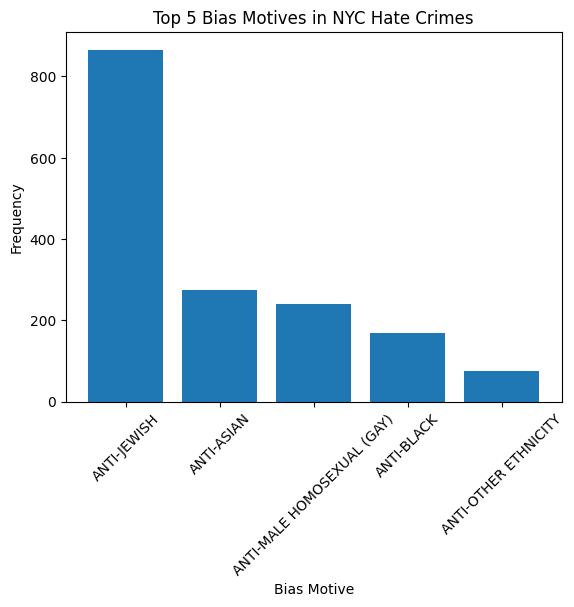

In [23]:
import csv
import matplotlib.pyplot as plt

with open('../data/NYPD_Hate_Crimes.csv', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader) 
    bias_counts = {}
    for row in reader:
        bias_motive = row[10]
        if bias_motive not in bias_counts:
            bias_counts[bias_motive] = 1
        else:
            bias_counts[bias_motive] += 1


top5_bias = sorted(bias_counts.items(), key=lambda x: x[1], reverse=True)[:5]
bias_labels = [bias[0] for bias in top5_bias]
bias_freqs = [bias[1] for bias in top5_bias]

plt.bar(bias_labels, bias_freqs)
plt.title('Top 5 Bias Motives in NYC Hate Crimes')
plt.xlabel('Bias Motive')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The most discriminated against group in NYC are Jews, coming in at second and third are Asians and Homosexual Men in terms of hate crimes perpretrated against them as a bias

## Part 6 - Conclusion

The conclusion of this data analysis is that the highest amount of hate crimes in NYC was committed against Jewish people, and that the borough it occured most in was Brooklyn in the year 2019

## Bonus - Correlation Between Height and Weight (related to another dataset)

1. WEIGHTLBTC_A   - Weight without shoes (pounds), public use 
HEIGHTTC_A - Total height in inches, public use 

2. missing data is simply an empty string, no whitespace


Correlation coefficient: 0.7604621859407162


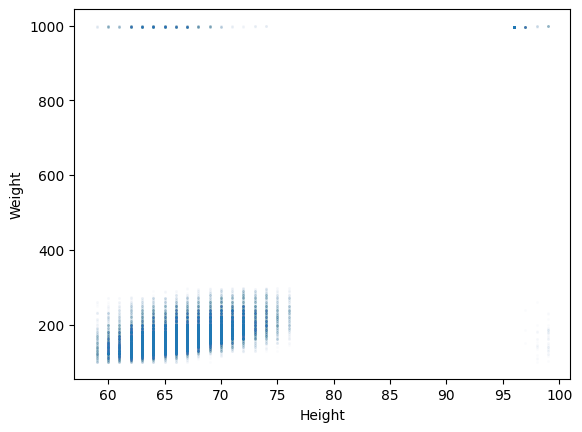

In [24]:
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('../data/adult19.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    height = []
    weight = []

    for row in reader:

        height.append(float(row['HEIGHTTC_A']))
        weight.append(float(row['WEIGHTLBTC_A']))
    

    corrcoef = np.corrcoef(height, weight)[0,1]
    print(f"Correlation coefficient: {corrcoef}")
    

    plt.scatter(height, weight, alpha=0.01, s=2)
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.show()
